<a href="https://colab.research.google.com/github/HarshaliD/Deep-Learning/blob/main/ImageClassificationUsingCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification Using CNN
What is CNN?

A **Convolutional Neural Network (CNN)** is a type of deep learning algorithm that is particularly well-suited for image recognition and processing tasks. It is made up of multiple layers, including convolutional layers, pooling layers, and fully connected layers.

In this notebook , 2 examples for application of CNN are showed.

*First,*
CNN is applied on **CIFAR10 Dataset.**
*Second,*
CNN is applied on **MNIST dataset**

# CIFAR10 Dataset
[Link to Dataset](https://www.cs.toronto.edu/~kriz/cifar.html])

Dataset has following features:


1.   It has 60000 32*32 color images in 10 classes.
2.   
50000 training images and 10000 testing images
3.3 RGB Channel



**Matplotlib**: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. plt is a commonly used alias for the pyplot module, which provides a MATLAB-like interface for plotting.

**TensorFlow**: TensorFlow is an open-source machine learning library developed by the Google Brain team. It provides a comprehensive set of tools for building and deploying machine learning models. TensorFlow supports both deep learning and traditional machine learning.

**Keras**: Keras is a high-level neural networks API written in Python that runs on top of various lower-level deep learning libraries, including TensorFlow. TensorFlow 2.x integrates Keras as its official high-level API.

**Datasets**: The datasets module in Keras provides a collection of commonly used datasets for training and testing machine learning models. This includes datasets like MNIST, CIFAR-10, and more.

**Layers**: The layers module in Keras includes a variety of pre-built layers that you can use to construct your neural network architectures. This includes dense layers, convolutional layers, recurrent layers, etc.

**Models**: The models module in Keras provides a way to define and compile neural network models. It includes functions to create common architectures like Sequential models and more complex functional API-based models.

**NumPy**: NumPy is a fundamental package for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these elements. NumPy is often used for data manipulation and preprocessing in machine learning.

In [70]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np


Splitting a dataset into training and testing sets.

**X_train** typically represents the features or input data used for training a machine learning model.

**y_train** represents the corresponding labels or target values associated with the training data.

**X_test** represents the features or input data for testing the model.

**y_test** represents the corresponding labels or target values associated with the testing data.


In [71]:
(X_train,y_train),(X_test,y_test)= datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [72]:
X_test.shape

(10000, 32, 32, 3)

In [73]:
X_train[0]        #3d array

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [74]:
y_train[:5]  #2d

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [75]:
y_train = y_train.reshape(-1,)        #reshape can be used for flattening
y_train[:5]                           #1d

array([6, 9, 9, 4, 1], dtype=uint8)

In [76]:
classes= ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [77]:
classes[6]

'frog'

In [78]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

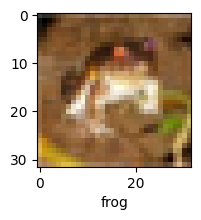

In [79]:
plot_sample(X_train,y_train,0)

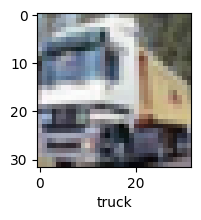

In [80]:
plot_sample(X_train,y_train,1)

**Normalization**

Normalization is a data preprocessing technique used to adjust the values of features in a dataset to a common scale.

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [81]:
#normalization i.e 0-1 range

X_train=X_train/255
X_test=X_test/255

**ANN (Artificial Neural Network)**

ANNs typically have an input layer, one or more hidden layers, and an output layer. Information flows from the input layer through the hidden layers to produce an output.

Weights and Activation Functions: Each connection between nodes has a weight, and each node applies an activation function to the weighted sum of its inputs. This introduces non-linearity, enabling the network to learn complex patterns.

Learning: ANNs learn from data by adjusting the weights during a training process. This involves using a loss function to measure the difference between predicted and actual outputs and optimizing the weights to minimize this difference.

First, let's build a ANN.Later, we can see the difference of performane of ANN and CNN.

In [82]:
#ANN
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 160s 102ms/step - loss: 1.8107 - accuracy: 0.3543
Epoch 2/5
1563/1563 [==============================] - 184s 118ms/step - loss: 1.6231 - accuracy: 0.4283
Epoch 3/5
1563/1563 [==============================] - 207s 132ms/step - loss: 1.5419 - accuracy: 0.4576
Epoch 4/5
1563/1563 [==============================] - 210s 134ms/step - loss: 1.4830 - accuracy: 0.4789
Epoch 5/5
1563/1563 [==============================] - 208s 133ms/step - loss: 1.4327 - accuracy: 0.4947


**models.Sequential**: This creates a sequential neural network model, which is a linear stack of layers.

**layers.Flatten**: This layer is used to flatten the input. In this case, it's used as the input layer to flatten the 32x32x3 image data to a 1D array.

**layers.Dense**: These are fully connected layers, where each neuron is connected to every neuron in the previous layer.

**ReLU (Rectified Linear Unit)**:

Function: ReLU is an activation function commonly used in neural networks.It returns the input for positive values and zero for negative values. It introduces non-linearity and helps networks learn complex patterns.

Mathematical Definition:
f(x)=max(0,x)

**Sigmoid:**

Function: Sigmoid is another activation function used in neural networks.It squashes input values between 0 and 1, making it suitable for binary classification problems. It's often used in the output layer for binary classification tasks, providing probabilities that sum to 1.

Mathematical Definition:
f(x)=
1/(1+e**(−x))

**ann.compile**: Configures the model for training.

**optimizer='SGD'**: Stochastic Gradient Descent is used as the optimizer for updating the model's weights during training.

**loss='sparse_categorical_crossentropy':**This is the loss function used for training the model. It is commonly used for multi-class classification tasks.

**metrics=['accuracy']**: Monitors the accuracy during training.

**epochs=5**: Specifies the number of times the model should iterate over the entire training dataset during training.

**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [83]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report for ANN: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 10s 32ms/step
Classification Report for ANN: 
               precision    recall  f1-score   support

           0       0.58      0.49      0.53      1000
           1       0.65      0.52      0.58      1000
           2       0.36      0.40      0.38      1000
           3       0.30      0.48      0.37      1000
           4       0.55      0.24      0.34      1000
           5       0.45      0.29      0.36      1000
           6       0.47      0.65      0.54      1000
           7       0.65      0.44      0.53      1000
           8       0.54      0.72      0.61      1000
           9       0.51      0.59      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.48     10000
weighted avg       0.51      0.48      0.48     10000



**CNN (Convolutional Neural Network)**

Now, lets bulid a CNN using the ANN we created before.

In [84]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

**Convolutional Layers (Conv2D)**:

`layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3))`:

This is the first convolutional layer with 32 filters (output channels), each using a 3x3 kernel.

The activation function is ReLU (Rectified Linear Unit), introducing non-linearity.

`input_shape=(32, 32, 3)` specifies the shape of the input data (32x32 images with 3 color channels).

`layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'):`

This is the second convolutional layer with 64 filters and a 3x3 kernel.
Again, ReLU is used as the activation function.

**Max Pooling Layers (MaxPooling2D)**:

`layers.MaxPooling2D((2, 2))`:
Max pooling is applied after each convolutional layer to reduce spatial dimensions.
The (2, 2) parameter specifies a 2x2 pooling window.

`layers.Dense(10, activation='softmax')`:

The final dense layer with 10 neurons, representing the output classes in a multi-class classification task.
Softmax activation is used to convert raw scores into probabilities, ensuring the output sums to 1.

In [85]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 80s 50ms/step - loss: 1.4794 - accuracy: 0.4659
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1087 - accuracy: 0.6102
Epoch 3/10
1563/1563 [==============================] - 89s 57ms/step - loss: 0.9826 - accuracy: 0.6566
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9006 - accuracy: 0.6868
Epoch 5/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.8355 - accuracy: 0.7100
Epoch 6/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.7767 - accuracy: 0.7313
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7305 - accuracy: 0.7455
Epoch 8/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.6884 - accuracy: 0.7609
Epoch 9/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.6489 - accuracy: 0.7753
Epoch 10/10
1138/1563 [====================>.........] - ETA: 19

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [ ]:
cnn.evaluate(X_test,y_test)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

In [ ]:
y_test[:5]

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
print("Classification Report for CNN: \n", classification_report(y_test, y_classes))

# MNIST datase
Use CNN to do handwritten digits classification using MNIST dataset.
[Link to Dataset](https://www.tensorflow.org/datasets/catalog/mnist)




In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
len(X_train)

In [ ]:
len(X_test)

In [ ]:
X_train[0].shape

In [ ]:
X_train[0]

In [ ]:
plt.matshow(X_train[0])